# Домашняя работа 6

## Загрузка данных и первичный анализ

Загружаем все что нам потребуется из библиотек и импортируем dataset

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    RocCurveDisplay,
    confusion_matrix,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.inspection import permutation_importance

import joblib
import json
from pathlib import Path
from datetime import datetime

RANDOM_STATE=42

data_path = "data/S06-hw-dataset-04.csv"
artifacts_path = Path("artifacts")
artifacts_path.mkdir(parents=True,exist_ok=True)

dataset = pd.read_csv(data_path)


Выводим базовые статистики датасета

In [48]:
dataset.head(5)

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
0,1,-1.250210,1.423474,-0.225004,-4.023138,-0.832729,-0.550874,1.772090,2.761690,-0.698750,...,10.938269,0.501178,1.600001,0.314212,1.209735,1.355697,-5.338924,1.153944,-0.153934,0
1,2,0.074328,0.376429,0.212831,-0.502074,2.017405,0.625496,1.943785,1.242030,-0.524090,...,7.775262,-4.550195,6.272586,-0.932162,-0.228543,1.735220,-3.827828,0.292165,0.273720,0
2,3,0.638481,0.060968,0.746760,2.479653,-0.292858,-0.078139,-2.918423,-0.013186,1.009135,...,-4.448447,-9.593179,-3.093519,0.029321,0.605511,0.829103,-0.085985,2.891408,0.766221,0
3,4,1.712916,-1.350969,-0.256473,1.622074,-0.445141,0.911932,-3.440345,1.505192,-1.104348,...,-1.619072,-3.237479,-5.474038,-1.582475,0.198137,3.823409,0.880395,1.148610,0.136732,0
4,5,0.905676,-0.206545,-0.068806,4.086026,-1.010045,-0.772644,-4.207688,2.506104,1.589143,...,-2.396844,-10.540129,-5.532811,-1.231203,0.000119,4.298572,-1.558235,0.924673,0.111668,0


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  f21     25000 non-null  float64
 22

In [50]:
dataset.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,12500.500000,-0.000386,-0.004872,0.003202,0.335329,-0.000563,-0.010118,0.001182,0.957385,-0.004658,...,-0.166251,-3.387506,1.749793,-0.013017,-0.001383,0.893365,-0.909479,0.000570,-0.000754,0.04920
std,7217.022701,1.001623,0.995606,1.004367,3.207537,0.993965,1.002172,2.432162,1.830223,1.013470,...,4.234741,4.331576,5.318660,1.001594,0.996409,2.445185,1.962618,0.994320,0.997167,0.21629
min,1.000000,-4.370993,-4.087073,-4.103875,-13.249937,-4.118778,-3.895974,-8.883224,-8.132548,-4.068933,...,-20.021141,-18.332290,-20.336666,-4.349216,-4.119472,-9.508509,-7.919287,-4.038312,-3.812255,0.00000
25%,6250.750000,-0.680165,-0.675100,-0.675426,-1.750048,-0.669764,-0.674374,-1.647977,-0.217260,-0.688278,...,-2.897904,-6.278403,-1.775889,-0.689962,-0.676191,-0.735473,-2.226959,-0.666367,-0.665861,0.00000
50%,12500.500000,0.001859,-0.000247,0.013272,0.403483,-0.001309,-0.005994,-0.011349,0.963009,0.000414,...,-0.396946,-3.462072,1.931851,-0.020933,-0.004193,0.888535,-0.923354,0.004381,0.002420,0.00000
75%,18750.250000,0.679702,0.659523,0.683437,2.486453,0.672299,0.652629,1.658680,2.167758,0.681040,...,2.344956,-0.578540,5.473886,0.661300,0.673722,2.516790,0.395648,0.666474,0.665918,0.00000
max,25000.000000,4.208888,3.984564,3.793442,15.288250,4.020733,4.279607,9.538525,9.321099,4.261349,...,20.717964,18.818764,20.688069,4.338337,3.902131,11.880651,6.778980,3.834922,4.012639,1.00000


In [51]:
dataset["target"].value_counts(normalize=True)

target
0    0.9508
1    0.0492
Name: proportion, dtype: float64

## Train/Test-сплит и воспроизводимость

Для удобства работы создадим несколько функций которые помогут считать метрики, а также сохранять в json-файл

In [52]:
def compute_metrics(y_true, y_pred, y_proba=None) -> dict:
    m = {
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "f1": float(f1_score(y_true, y_pred)),
    }
    if y_proba is not None:
        try:
            m["roc_auc"] = float(roc_auc_score(y_true, y_proba))
        except Exception:
            m["roc_auc"] = None
    else:
        m["roc_auc"] = None
    return m

def evaluate_on_test(model, X_test, y_test, label: str) -> dict:
    pred = model.predict(X_test)
    proba = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    metrics = compute_metrics(y_test, pred, proba)
    metrics["model"] = label
    return metrics

def save_json(obj: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

Также сделаем 2 функции для графиков по метрикам

In [53]:
def plot_confusion(y_true, y_pred, title: str, path: str):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("pred")
    plt.ylabel("true")
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.savefig(path)
    plt.show()

def plot_roc(model, X_test, y_test, title: str, path: str):
    if not hasattr(model, "predict_proba"):
        print("ROC: модель не поддерживает predict_proba")
        return
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(title)
    plt.savefig(path)
    plt.show()

Выделяем признаки и таргет и делаем Train/Test сплит

In [54]:
X = dataset.drop("target",axis=1).drop("id",axis=1)
y = dataset["target"]

feature_names = list(X.columns)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y
)


print("Размеры выборок:")
print("- train:", X_train.shape)
print("- test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
- train: (18750, 60)
- test:  (6250, 60)

Распределение классов (train):
target
0    0.950773
1    0.049227
Name: proportion, dtype: float64

Распределение классов (test):
target
0    0.95088
1    0.04912
Name: proportion, dtype: float64


Фиксированный random seed и stratify важны для воспроизводимости результатов, так как они позволяют одинаково распределять данные и обучать модель

## Baseline’ы

Для удобства работы сделаем один список и два словаря, в которые будем сохранять модели и их метрики

In [56]:
results = []
best_models = {}
search_summaries = {}

Создаем два baseline'а для минимальной точки отсчета качества 

In [57]:
dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(X_train,y_train)

results.append(evaluate_on_test(dummy,X_test,y_test,"Dummy(most_frequent)"))
best_models["Dummy(most_frequent)"] = dummy


In [58]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=RANDOM_STATE)


pipe = Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("lr",LogisticRegression(
        max_iter=4000,
        random_state=RANDOM_STATE))
])

lr_grid={
    "lr__C":[0.1,1.0,10.0],
    "lr__solver":["lbfgs"],
}

lr_search= GridSearchCV(
    pipe,lr_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

lr_search.fit(X_train,y_train)

best_lr_model = lr_search.best_estimator_
best_models["LogReg(scaled)"] = best_lr_model

search_summaries["LogReg(scaled)"] = {
    "best_params": lr_search.best_params_,
    "best_cv_roc_auc": float(lr_search.best_score_),
}

results.append(evaluate_on_test(best_lr_model,X_test,y_test,"LogReg(scaled)"))

search_summaries["LogReg(scaled)"]

{'best_params': {'lr__C': 0.1, 'lr__solver': 'lbfgs'},
 'best_cv_roc_auc': 0.820248855339833}

In [59]:
results

[{'accuracy': 0.95088,
  'f1': 0.0,
  'roc_auc': 0.5,
  'model': 'Dummy(most_frequent)'},
 {'accuracy': 0.96256,
  'f1': 0.4090909090909091,
  'roc_auc': 0.8400411948253248,
  'model': 'LogReg(scaled)'}]

Можно заметить что у Dummy-классификатора метрика accuracy совпадает с распределением "0" таргета, но так или иначе линейная регрессия справилась с этой задачей лучше

## Новые модели

Добавим еще одну ключевую функцию для подбора гиперпараметров, нахождения лучшей модели, а также подсчета метрик

In [60]:
def run_search(label: str, estimator, param_grid: dict):
    search = GridSearchCV(
        estimator,
        param_grid,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        refit=True,
        return_train_score=True
    )
    search.fit(X_train, y_train)

    best = search.best_estimator_
    best_models[label] = best
    search_summaries[label] = {
        "best_params": search.best_params_,
        "best_cv_roc_auc": float(search.best_score_),
    }
    results.append(evaluate_on_test(best, X_test, y_test, label))
    return search

Создаем три новые модели - DecisionTreeClassifier, RandomForestClassifier и HistGradientBoosting

In [61]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_grid={
    "max_depth":[None,3,5,8],
    "min_samples_leaf":[1,5,10,20],
    "ccp_alpha":[0.0,0.001,0.005,0.01],
}

dt_search = run_search("DecisionTree",dt,dt_grid)
search_summaries["DecisionTree"]


{'best_params': {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 20},
 'best_cv_roc_auc': 0.7944797313188933}

In [62]:
rf = RandomForestClassifier(
    n_estimators=600,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    oob_score=False
)

rf_grid = {
    "max_depth":[None,6,10],
    "min_samples_leaf":[1,5,10],
    "max_features":["sqrt",0.5],
}


rf_search=run_search("RandomForest",rf,rf_grid)
search_summaries["RandomForest"]

{'best_params': {'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 5},
 'best_cv_roc_auc': 0.8846524269780405}

In [63]:
hgb = HistGradientBoostingClassifier(
    random_state = RANDOM_STATE,
    early_stopping=True
)

hgb_grid = {
    "learning_rate":[0.03,0.05,0.1],
    "max_depth":[2,3,None],
    "max_leaf_nodes":[15,31,63]
}

hgb_search = run_search("HistGradientBoosting",hgb,hgb_grid)
search_summaries["HistGradientBoosting"]

{'best_params': {'learning_rate': 0.05,
  'max_depth': None,
  'max_leaf_nodes': 63},
 'best_cv_roc_auc': 0.8962365852219099}

Создаем стек трех моделей и метамодель

In [64]:
estimators=[
    ("lr",best_models["LogReg(scaled)"]),
    ("rf",best_models["RandomForest"]),
    ("hgb",best_models["HistGradientBoosting"]),
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=4000,random_state=RANDOM_STATE),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

stack.fit(X_train,y_train)
best_models["Stacking"] = stack
results.append(evaluate_on_test(stack,X_test,y_test,"Stacking"))

{"note":"stacking fitted"}

{'note': 'stacking fitted'}

## Сводка результатов

Сортируем все результаты и выводим их

In [65]:
results_sorted = pd.DataFrame(results)
results_sorted["roc_auc_sort"]=results_sorted["roc_auc"].fillna(-1.0)
results_sorted = results_sorted.sort_values(["roc_auc_sort","accuracy"],ascending=False).drop(columns=["roc_auc_sort"])

results_sorted

,accuracy,f1,roc_auc,model
5,0.98160,0.776699,0.906037,Stacking
4,0.97984,0.742857,0.904646,HistGradientBoosting
3,0.97024,0.567442,0.903547,RandomForest
1,0.96256,0.409091,0.840041,LogReg(scaled)
2,0.96848,0.588727,0.827972,DecisionTree
0,0.95088,0.000000,0.500000,Dummy(most_frequent)


Сохраняем результаты в json-формате

In [66]:
metrics_path = artifacts_path / "metrics_test.json"
search_path = artifacts_path / "search_summaries.json"

metrics_test_dict = dict()
metadata = {
    "experiment_name": "HW06 - Деревья решений и ансамбли",
    "dataset": "S06-hw-dataset-04.csv",
    "test_size": 0.25,
    "random_state": RANDOM_STATE,
    "time": datetime.now().isoformat(),
}
metrics = dict()
for model_metrics in results_sorted.to_dict(orient="records"):
    metrics[model_metrics["model"]] = {
        "accuracy": model_metrics["accuracy"],
        "f1": model_metrics["f1"],
        "roc_auc": model_metrics["roc_auc"],
    }

metrics_test_dict["metadata"] = metadata
metrics_test_dict["metrics"] = metrics

save_json(metrics_test_dict,metrics_path)
save_json(search_summaries,search_path)

print("Saved:",metrics_path)
print("Saved:",search_path)

Saved: artifacts\metrics_test.json
Saved: artifacts\search_summaries.json


Для лучшей модели (по ROC-AUC ) делаем быструю диагностику

In [67]:
best_row = results_sorted.iloc[0]
best_label = best_row["model"]
best_model = best_models[best_label]

best_label,best_row.to_dict()

('Stacking',
 {'accuracy': 0.9816,
  'f1': 0.7766990291262136,
  'roc_auc': 0.9060373219855731,
  'model': 'Stacking'})

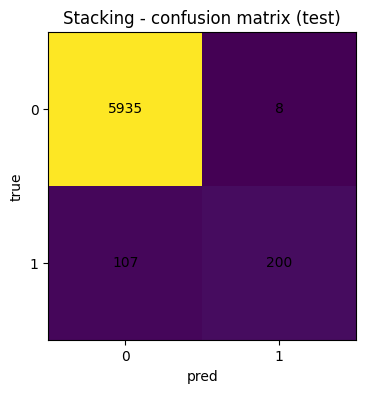

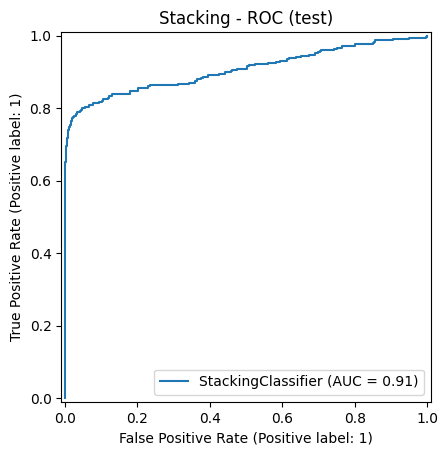

In [68]:
y_pred = best_model.predict(X_test)

plot_confusion(y_test,y_pred,title=f"{best_label} - confusion matrix (test)",path="artifacts/figures/best_model_confusion_matrix_test.png")
plot_roc(best_model,X_test,y_test,title=f"{best_label} - ROC (test)",path="artifacts/figures/best_model_ROC_test.png")

## Интерпретация

Для топ модели по roc_auc посчитаем permutation_importance(top-15)

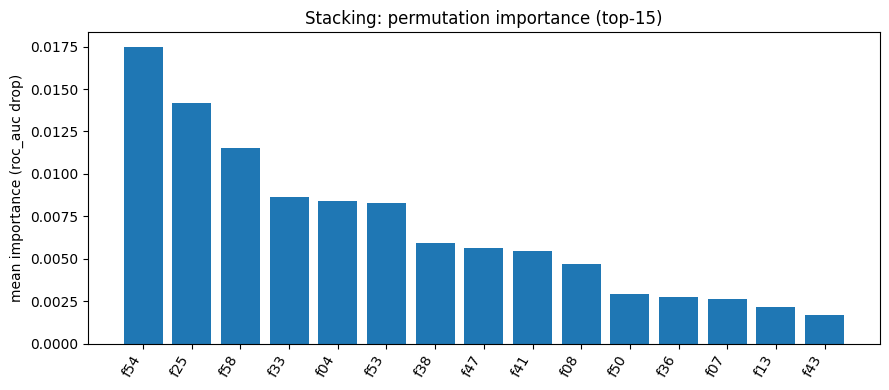

In [69]:
scoring = "roc_auc" if hasattr(best_model,"predict_proba") else "accuracy"


perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=8,
    random_state=RANDOM_STATE,
    scoring=scoring
)

imp = perm.importances_mean
idx = np.argsort(imp)[::-1][:15]

plt.figure(figsize=(9, 4))
plt.bar(range(len(idx)), imp[idx])
plt.xticks(range(len(idx)), [feature_names[i] for i in idx], rotation=60, ha="right")
plt.ylabel(f"mean importance ({scoring} drop)")
plt.title(f"{best_label}: permutation importance (top-15)")
plt.tight_layout()
plt.show()

Несмотря на то, что все наши классы в самих данных имеют одинаковое количество значений, в ходе обучения выясняется что на деле имеется довольно сильный дисбаланс классов. Разница между 1 и 15 в top-15 классов очень сильна, из чего можно сделать вывод что все остальные классы идут на сильный спад, и по сути самых важных классов всего несколько.

## Сохранение лучшей модели и ее meta-данных

In [70]:
model_path = artifacts_path / "best_model.joblib"
joblib.dump(best_model,model_path)

meta = {
    "best_model_label": best_label,
    "test_metrics": best_row.to_dict(),
    "search_summary": search_summaries.get(best_label, None),
    "random_state": RANDOM_STATE,
}

save_json(meta,artifacts_path / "best_model_meta.json")

print("Saved:", model_path)
print("Saved:", artifacts_path / "best_model_meta.json")

Saved: artifacts\best_model.joblib
Saved: artifacts\best_model_meta.json
